# Spam Email Detection

## Pipeline:
1.Data Cleaning

2.EDA(exploratory data analysis)

3.Text Preprocessing

4.Model Building

5.Evaluation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-spam-dataset/spam_email_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/email-spam-dataset/spam_email_dataset.csv")

In [4]:
df.head(20)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


## Data Cleaning

In [5]:
# Missing Values
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 0','label'],inplace=True)

In [7]:
df.shape

(5171, 2)

In [8]:
df.rename(columns={'text':'mail','label_num':'label'},inplace=True)

In [9]:
# Duplicated Rows
df.duplicated().sum()

178

In [10]:
df = df.drop_duplicates(keep='first')

## EDA

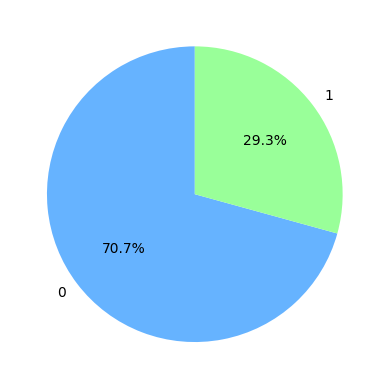

In [11]:
value_counts = df['label'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.show()

In [12]:
# Data is NOT Balanced for both classification Classes

In [13]:
df

,mail,label
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5169,Subject: industrial worksheets for august 2000...,0


## Text Preprocessing

In [14]:
# What to do
# 1. Lower case
# 2. Tokenization
# 3. Removing Special Characters
# 4. Removing Stop Words and Punctuation
# 5. Stemming

In [15]:
!pip install nltk

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[1:5]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['me', 'my', 'myself', 'we']

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [25]:
def preprocess_text(text):
  # Lower Case
  text = text.lower()

  # Tokenization
  text = nltk.word_tokenize(text)

  # Removing Special Characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  # Stopwrds, punc and stemming
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation :
      i = ps.stem(i)
      if i != "subject":
            y.append(i)


  return " ".join(y)

In [26]:
preprocess_text(df['mail'][0])

'enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [27]:
df['transformed_mail'] = df['mail'].apply(preprocess_text)

In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=800,min_font_size=10, background_color='black')

In [29]:
spam = wc.generate(df[df['label']==1]['transformed_mail'].str.cat(sep=" "))

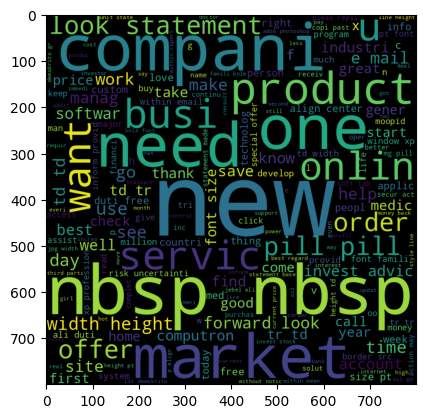

In [30]:
plt.imshow(spam)

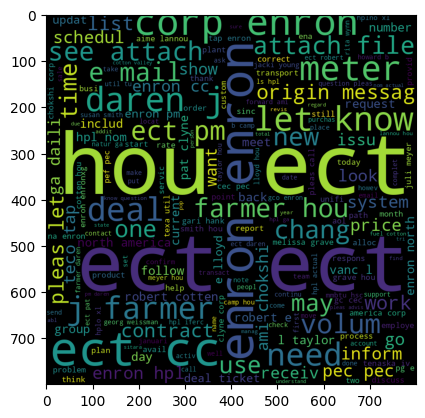

In [31]:
not_spam = wc.generate(df[df['label']==0]['transformed_mail'].str.cat(sep=" "))
plt.imshow(not_spam)

## Model Building - ML

In [32]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [33]:
X = cv.fit_transform(df['transformed_mail']).toarray()

In [34]:
X.shape

(4993, 42591)

In [35]:
y = df['label'].values

In [36]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 17)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [40]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [41]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb,
    'BNB': bnb, 
    'GNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [42]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [43]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.8208208208208209
Precision -  0.6273148148148148
For  MNB
Accuracy -  0.984984984984985
Precision -  0.9628378378378378
For  BNB
Accuracy -  0.8628628628628628
Precision -  0.9269662921348315
For  GNB
Accuracy -  0.984984984984985
Precision -  0.9628378378378378
For  DT
Accuracy -  0.8368368368368369
Precision -  0.647887323943662
For  LR
Accuracy -  0.954954954954955
Precision -  0.9039735099337748
For  RF
Accuracy -  0.95995995995996
Precision -  0.9307958477508651
For  AdaBoost
Accuracy -  0.944944944944945
Precision -  0.8926174496644296
For  BgC
Accuracy -  0.9429429429429429
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.970970970970971
Precision -  0.9304635761589404
For  GBDT
Accuracy -  0.9409409409409409
Precision -  0.8758169934640523
For  xgb
Accuracy -  0.963963963963964
Precision -  0.9230769230769231


In [44]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [45]:
performance_df

,Algorithm,Accuracy,Precision
2,MNB,0.984985,0.962838
4,GNB,0.984985,0.962838
7,RF,0.959960,0.930796
10,ETC,0.970971,0.930464
3,BNB,0.862863,0.926966
12,xgb,0.963964,0.923077
6,LR,0.954955,0.903974
8,AdaBoost,0.944945,0.892617
9,BgC,0.942943,0.891892
11,GBDT,0.940941,0.875817


In [46]:
# Using tfidf vectorizer

In [47]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_mail']).toarray()

In [48]:
y = df['label'].values

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 17)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [52]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb,
    'BNB': bnb, 
    'GNB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [53]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.982982982982983
Precision -  0.9533333333333334
For  KN
Accuracy -  0.5615615615615616
Precision -  0.39752407152682256
For  MNB
Accuracy -  0.9099099099099099
Precision -  1.0
For  BNB
Accuracy -  0.8628628628628628
Precision -  0.9269662921348315
For  GNB
Accuracy -  0.9099099099099099
Precision -  1.0
For  DT
Accuracy -  0.8368368368368369
Precision -  0.6458333333333334
For  LR
Accuracy -  0.948948948948949
Precision -  0.8742138364779874
For  RF
Accuracy -  0.965965965965966
Precision -  0.9322033898305084
For  AdaBoost
Accuracy -  0.9469469469469469
Precision -  0.8986486486486487
For  BgC
Accuracy -  0.953953953953954
Precision -  0.8957654723127035
For  ETC
Accuracy -  0.96996996996997
Precision -  0.9419795221843004
For  GBDT
Accuracy -  0.9409409409409409
Precision -  0.8733766233766234
For  xgb
Accuracy -  0.9579579579579579
Precision -  0.9022801302931596


In [54]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [57]:
performance_df

,Algorithm,Accuracy,Precision
2,MNB,0.909910,1.000000
4,GNB,0.909910,1.000000
0,SVC,0.982983,0.953333
10,ETC,0.969970,0.941980
7,RF,0.965966,0.932203
3,BNB,0.862863,0.926966
12,xgb,0.957958,0.902280
8,AdaBoost,0.946947,0.898649
9,BgC,0.953954,0.895765
6,LR,0.948949,0.874214


In [ ]:
# Taking cv -> mnb

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [60]:
X = cv.fit_transform(df['transformed_mail']).toarray()

In [61]:
y = df['label'].values

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 17)

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
mnb = MultinomialNB()

In [65]:
clfs_final = {
    'MNB': mnb,
}

In [66]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs_final.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  MNB
Accuracy -  0.984984984984985
Precision -  0.9628378378378378


In [68]:
import pickle
pickle.dump(tfidf,open('mail_vectorizer.pkl','wb'))
pickle.dump(mnb,open('mail_mnb_model.pkl','wb'))